In [1]:
%matplotlib inline 

import os
import glob
import numpy as np
import pandas as pd
from skimage import io 
import rasterio
import subprocess as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import datetime

In [2]:
dt     = []
sd_lst = np.array([])
sc_lst = np.array([])
pb_lst = np.array([])

In [3]:
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/'
# path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/batch_test'
#path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20170401_clipped.tif'


for f in sorted(glob.glob(os.path.join(path, '*.tif'))):
    print(f)
    dt_str = f.split('/')[-1]
#     print(dt_str)
#     dt_str = "".join(dt_str.isnumeric())
    for c in dt_str:
        dt_str = "".join([c for c in dt_str if c.isnumeric()])
        
#         for c in dt_str:
#             if c.is_numeric():
#                 dtst.append(c)
#         d_str = "".join(dst)
#         print(dt_str)
    


    raster = io.imread(f) #path

#     io.imshow(raster[:,:,0]) #snow depth, band1
#     io.show()

#     io.imshow(raster[:,:,1]) #alpha mask, band2
#     io.show()


    # convert to numpy array
    array = np.array(raster[:,:,0]) #RAW array of lidar tif

    # "snow mask", array of data and nans
    sno_mask = array.copy()
    idx=sno_mask > 0.001
    sno_mask[~idx] = np.nan
    
#     plt.imshow(sno_mask) 
#     plt.title('mask')
#     plt.colorbar()
#     plt.show()

    # meanSD -- caclulate mean snow depth (meanSD), without zero snow pixels
    mu_sd = np.nanmean(sno_mask) #mean snow depth, from sca's
#     print("mean snow depth", mu_sd,'meters')


    # SCA -- pixs snow cover * pixel size
#     num_pix = np.sum(array>0) #sum pixels >0
#     print("number pixels with snow cover",num_pix)
    
    ras =  rasterio.open(f) #getting pixel size
    gt = ras.transform
    pixelSizeX = gt[0]
    pixelSizeY =-gt[4] #notice the -gt
#     print('pixel size (x,y) = ',pixelSizeX, pixelSizeY)


    sca_km = np.sum(array>0) * pixelSizeX * pixelSizeY /1000**2
    
    
#     sca = num_pix * pixelSizeX * pixelSizeY
#     sca_km = sca/1000**2
    p_basin = sca_km/1180 *100  #per Hedrick et al. 2018
#     print('Snow Covered Area (SCA) = ', sca, 'm^2')
#     print('Snow Covered Area (SCA) = ', sca_km, 'km^2')
#     print('% Basin snow cover', p_basin, '%')

   
    
#     array.close()
#     sno_mask.close()
#     ras.close()
    dt.append(dt_str)
    
    sd_lst = np.append(sd_lst,mu_sd)
    sc_lst = np.append(sc_lst,sca_km)
    pb_lst = np.append(pb_lst,p_basin)

dt = pd.to_datetime(dt)

# print(dt)

# df1 = pd.DataFrame(zip(dt,sd_lst,sc_lst,pb_lst),columns = ['date','meanSD (m)','SCA (km)','% basin'],index_col = ['dt'])
# df1

/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20130403_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20130429_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20130503_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20130525_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20130601_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20130608_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20140323_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20140407_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20140413_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar

/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in greater
/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in greater


/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160401_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160407_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160416_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160426_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160509_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160527_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160607_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160613_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20160620_clipped.tif
/home/meganmason/Documents/projects/thesis/data/processing_lidar

In [4]:
df1 = pd.DataFrame(zip(sd_lst,sc_lst,pb_lst), columns = ['meanSD (m)','SCA (km)','% basin'],index = dt)
df1


,meanSD (m),SCA (km),% basin
2013-04-03,1.456748,590.093682,50.007939
2013-04-29,1.146422,452.968977,38.387201
2013-05-03,1.069508,389.105030,32.975003
2013-05-25,0.946180,206.605858,17.508971
2013-06-01,0.945787,155.446059,13.173395
2013-06-08,0.845570,94.211339,7.984012
2014-03-23,1.065971,585.332593,49.604457
2014-04-07,1.221284,704.831855,59.731513
2014-04-13,1.106676,623.311542,52.823012
2014-04-20,1.152036,518.800971,43.966184


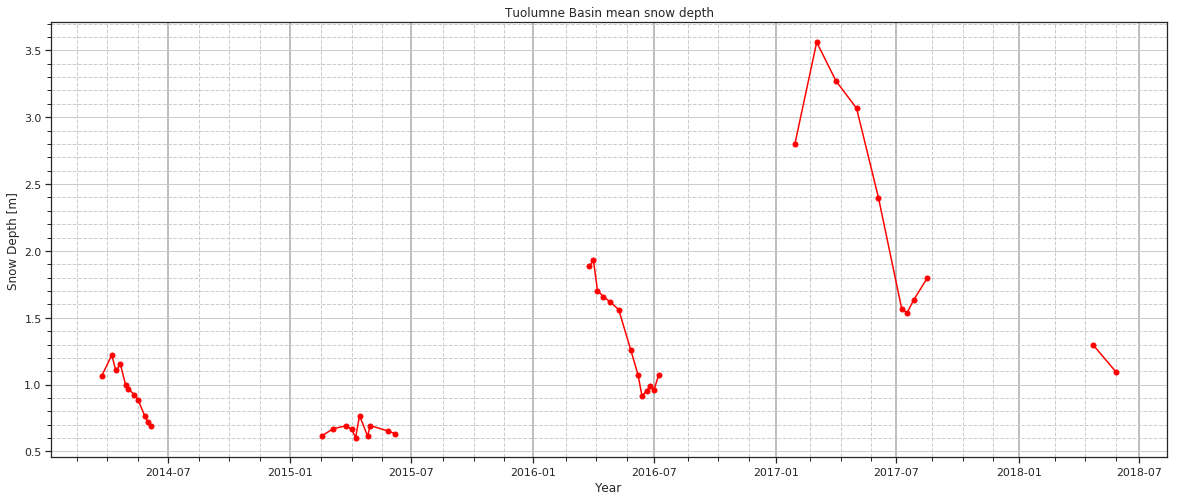

In [112]:
years = sorted(set([dt.year for dt in df1.index])) #set find uniques in list comp (loop that appends for you)
# print(years)
# print(df1.index)
# print(len(dt.year))

fig = plt.figure(figsize=(20,8))
for year in years: 
    startTime = pd.to_datetime("10-01-{}".format(year))
    endTime = pd.to_datetime("09-30-{}".format(year+1))
    data = df1[(df1.index >= startTime) & (df1.index <= endTime)]
    plt.plot(data.index, data['meanSD (m)'],'r.-', markersize=10)
#     plt.annotate('%s',df1,xy=(data.min))
    
for ax in fig.get_axes():
   
    ax.grid(which='major')
    ax.minorticks_on()
    ax.grid(which='minor', ls='--')
    ax.grid(which='major', axis='x', ls='-', lw=1.5, c='darkGrey')
#     ax.set_xticks(years)
#     ax.xaxis.set_major_locator(years)
#     ax.set_xticklabels(labels=years)    
    
sns.set_style('darkgrid')
sns.set_style("ticks")
sns.set_context('notebook')

#x ticks??
# major_xticks = np.arange(years)
# plt.axes(xscale=years)
# plt.xticks(label=years)

#annotate
# plt.annotate('here',xy=(iy_min, ix_min))


plt.title('Tuolumne Basin mean snow depth')
plt.xlabel('Year'); plt.ylabel('Snow Depth [m]')

plt.show()


# for i in data:
#     plt.plot(dt.year, df1['meanSD (m)'], '-o', markersize=5)

#DataFrame Plot
# df1.plot(y='meanSD (m)', use_index = True)
# df1.plot(x=dt.years, y='meanSD (m)')   


In [111]:
print(df1['meanSD (m)'].max)
          

<bound method Series.max of 2013-04-03    1.456748
2013-04-29    1.146422
2013-05-03    1.069508
2013-05-25    0.946180
2013-06-01    0.945787
2013-06-08    0.845570
2014-03-23    1.065971
2014-04-07    1.221284
2014-04-13    1.106676
2014-04-20    1.152036
2014-04-28    0.994763
2014-05-02    0.967446
2014-05-11    0.925490
2014-05-17    0.881488
2014-05-27    0.761768
2014-05-31    0.723393
2014-06-05    0.693358
2015-02-18    0.619591
2015-03-06    0.669872
2015-03-25    0.691449
2015-04-03    0.667585
2015-04-09    0.604441
2015-04-15    0.768686
2015-04-27    0.614702
2015-05-01    0.693789
2015-05-28    0.652949
2015-06-08    0.631837
2016-03-26    1.885713
2016-04-01    1.930678
2016-04-07    1.703818
2016-04-16    1.658462
2016-04-26    1.618644
2016-05-09    1.561280
2016-05-27    1.261186
2016-06-07    1.075456
2016-06-13    0.916325
2016-06-20    0.952675
2016-06-25    0.991579
2016-07-01    0.958851
2016-07-08    1.070701
2017-01-29    2.796001
2017-03-03    3.560972
2017-0

ValueError: too many values to unpack (expected 2)

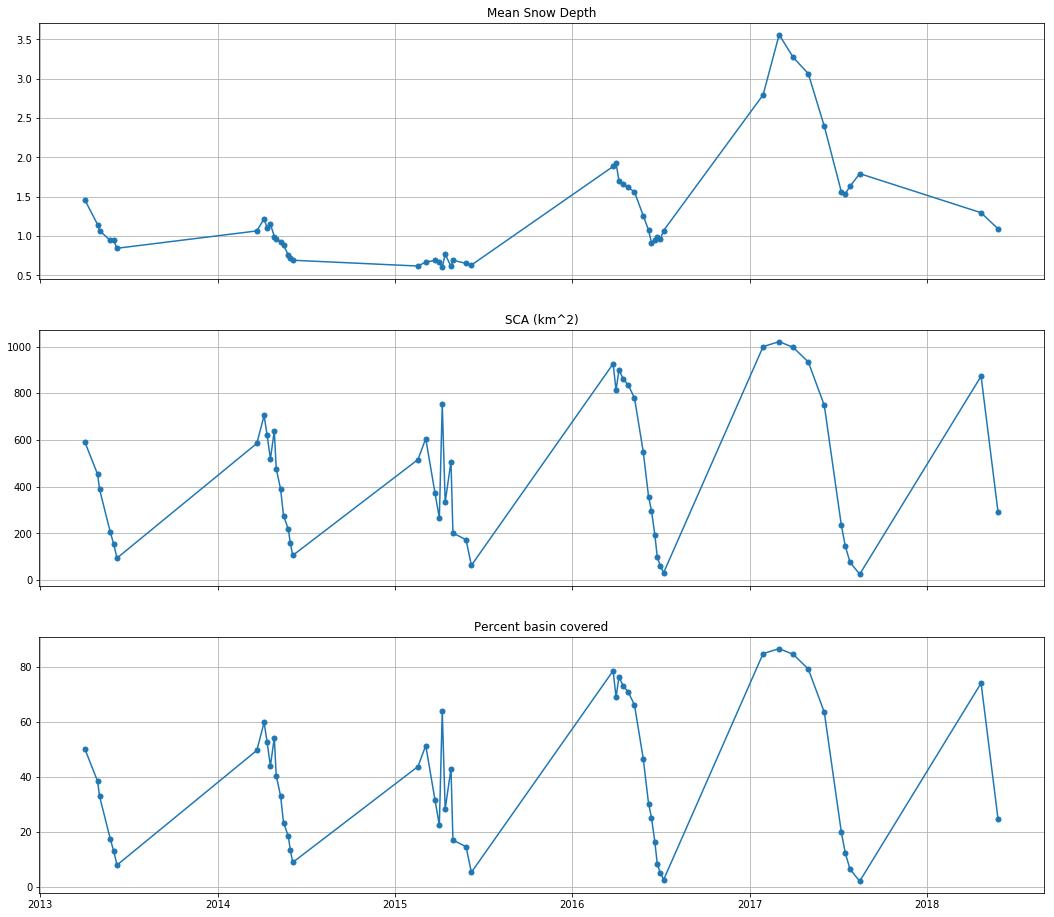

In [27]:
# fig, a=plt.subplots(3,1)
fig,(ax1,ax2,ax3) = plt.subplots(3,1, sharex=True,figsize=(18,16))

ax1.plot(df1['meanSD (m)'], '-o', markersize=5)
ax1.set_title('Mean Snow Depth')

ax2.plot(df1['SCA (km)'], '-o', markersize=5)
ax2.set_title('SCA (km^2)')

ax3.plot(df1['% basin'], '-o', markersize=5)
ax3.set_title('Percent basin covered')

for ax in fig.get_axes():
    ax.grid(True)
    
# for xy in zip(mu_sd):
# #     ax.annotate(dt,xy=(dt,mu_sd))
#     ax.annotate('%s,%s)' % xy, xy=xy)

for k, v in df1.iterrows():
    ax.annotate(k, v)
    

# a[0].plot(df1['meanSD (m)'])
# a[1].plot(df1['SCA (km)'])
# a[2].plot(df1['% basin'])

sns.set_style('darkgrid')
sns.set_style("ticks")
sns.set_context('notebook')

In [ ]:
print(zip(dt,mu_sd))

In [ ]:
# #Subnaught example: add to how to, snippits
# #list comp and testing multiple cases
# #condense if statements
# cases = ["test1", "test2", "test3", "test4"]

# test_list = ["test1", "test2", "test", "apple"]

# truths = [True for match in test_list if match in cases]
# if len(truths) == 3:
#     print("yay gor for")